## Dataset  Description

#### Context
- "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

#### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Exploration & loading the dataset

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('C:\\Users\\debru\\Churn Prediction Model\\.gradio\\flagged\\Churn dataset.csv')
df.shape

(7043, 21)

In [84]:
df1 = pd.read_csv("C:\\Users\\debru\\Churn Prediction Model\\.gradio\\flagged\\Churn dataset.csv")
df1.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [85]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.describe(include='all') #exploring the complete dataset

,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Tenure (months),Monthly Charges,Total Charges,output,timestamp
count,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2.0,0.0,2
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,2
top,Male,No,No,No,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,NaN,NaN,NaN,NaN,2025-08-19 06:26:11.606942
freq,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,50.0,500.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,50.0,500.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,50.0,500.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,50.0,500.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,50.0,500.0,NaN,NaN


- based on the .describe (and exploration) we can see that most categorical variables have between 2, 3, or 4 categories 
- So for those that only have 2 (binary) let's just replace by 0 and 1
- For those that have 3 or 4 we can do One-Hot encoding

## Binary Encoding

In [88]:
# Binary categorical columns (2 unique values)
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

# Map Yes/No and Male/Female to 0/1
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})

C:\Users\debru\AppData\Local\Temp\ipykernel_2728\2830485926.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [89]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## One-Hot encoding

In [90]:
# Categorical columns with value greater than 2 unique values will be one-hot encoded
# Get only categorical columns that exist in dataframe
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# One-hot encode
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [92]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Cleaning

In [94]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [95]:
df = df.drop('customerID', axis=1, errors='ignore')

In [97]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int) # converts True/False to 1/0 for all boolean cols

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [99]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


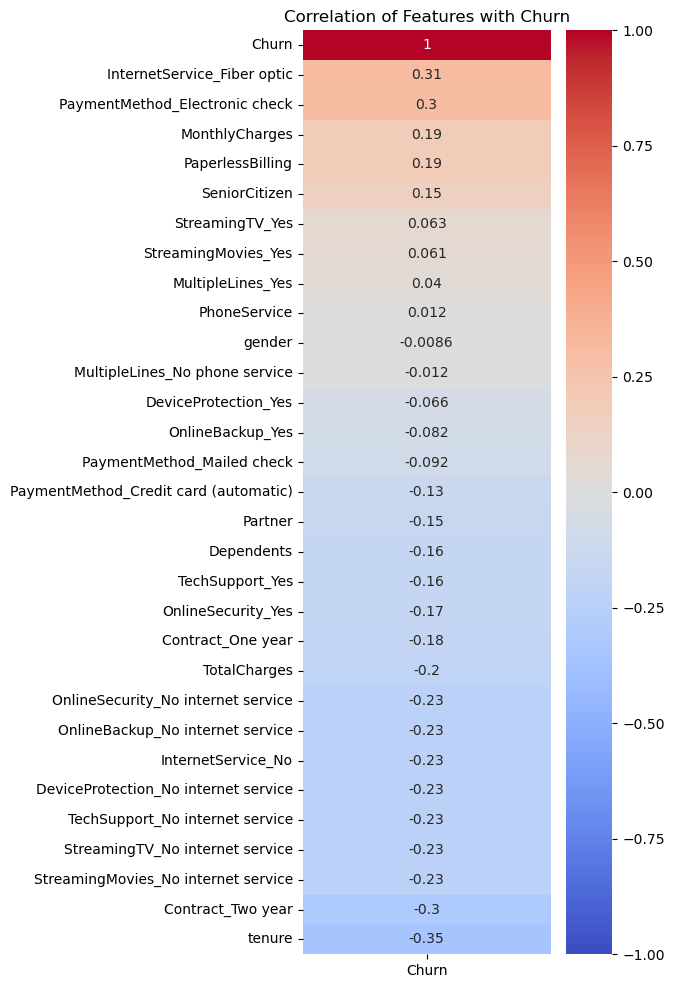

In [100]:
# Compute correlation matrix only for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Focus on correlation with Churn
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)

# Plot heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

Negative (lower value → less likely to churn):

- tenure (-0.35) → Customers who stay longer are less likely to churn.
- Contract_Two year (-0.30) → Customers on long-term contracts churn much less.
- Contract_One year (-0.18) → Same trend but weaker than two-year contracts.

Positive (higher value → more likely to churn):

- InternetService_Fiber optic (+0.31) → Fiber optic users churn more in this dataset.
- PaymentMethod_Electronic check (+0.30) → Customers paying electronically via check churn more.

## Look for multicolinearity (VIF)

In [101]:
# Drop columns that contain 'No internet service' and 'No phone service' to reduce multicollinearity
drop_cols = [col for col in df.columns if 'No internet service' in col or 'No phone service' in col]
if drop_cols:
    df = df.drop(columns=drop_cols)
    print(f"Dropped {len(drop_cols)} columns with 'No internet service' or 'No phone service'")

Dropped 7 columns with 'No internet service' or 'No phone service'


In [102]:
# Prepare X
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [67]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

             feature  VIF
5    Tenure (months)  0.0
6    Monthly Charges  0.0
7      Total Charges  0.0
0             Gender  NaN
1            Partner  NaN
2         Dependents  NaN
3      Phone Service  NaN
4  Paperless Billing  NaN


c:\Users\debru\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\debru\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


- Clearly we can see there's multicolinearity between features
- So either we need to drop some features or use regularization techniques like Lasso or Ridge regression to handle this
- Or use tree based models which are less sensitive to multicollinearity
- In decision trees, splits are based on feature importance for reducing impurity — redundant features just compete, but won’t cause unstable predictions.

## Machine learning

In [103]:
# We have a class imbalance problem
# Given your imbalance (27% churners), class weighting + threshold tuning is probably enough — no need for aggressive oversampling yet.
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In churn prediction, recall (and metrics derived from it, like F1) is usually the most important — here’s why:

1️⃣ Business context
Churn prediction is asymmetric in cost:

- False Negative (FN): You predict a customer will not churn, but they actually leave → you miss the chance to intervene and keep them.

- False Positive (FP): You predict a customer will churn, but they stay → you might spend some retention resources unnecessarily.

- Missing churners (FN) usually costs more than wrongly targeting a loyal customer.

Typical priority
- If retention campaigns are cheap → prioritize recall (catch every possible churner).
- If retention campaigns are expensive → balance precision and recall using F1 score or a precision-recall trade-off.
- If business wants a ranking of churn risk → use ROC-AUC or PR-AUC to evaluate the model.

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import time

# Prepare data - fill ALL NaN values 
df_prepared = df.copy()

# Convert 'Churn' to numeric if it's not already
if df_prepared['Churn'].dtype == 'object':
    df_prepared['Churn'] = pd.to_numeric(df_prepared['Churn'], errors='coerce')

# Fill NaN in all columns before processing
df_prepared = df_prepared.fillna(0)  # Fill all NaN with 0

X = df_prepared.drop(columns=['Churn'])
y = df_prepared['Churn']

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"y NaN count: {y.isna().sum()}")
print(f"X NaN count: {X.isna().sum().sum()}")

# Train-test split
if len(y) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=min(0.2, 0.5), random_state=42, stratify=y
    )
else:
    print("Warning: Dataset too small for proper train/test split")
    X_train, X_test = X, X
    y_train, y_test = y, y

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)

X shape: (7043, 23), y shape: (7043,)
y NaN count: 0
X NaN count: 0


### RandomForest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',   # handles imbalance for you
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba_result = rf.predict_proba(X_test)
# Handle case where only one class is present
if proba_result.shape[1] > 1:
    proba = proba_result[:, 1]
else:
    proba = proba_result[:, 0]

y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3, zero_division=0))

              precision    recall  f1-score   support

           0      0.884     0.761     0.818      1035
           1      0.523     0.725     0.608       374

    accuracy                          0.752      1409
   macro avg      0.704     0.743     0.713      1409
weighted avg      0.789     0.752     0.762      1409



In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba_result = rf.predict_proba(X_test)
# Handle case where only one class is present
if proba_result.shape[1] > 1:
    proba = proba_result[:, 1]
else:
    proba = proba_result[:, 0]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1, zero_division=0)
    rec = recall_score(y_test, preds, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, preds, pos_label=1, zero_division=0)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.498   0.797   0.613   
0.3     0.523   0.725   0.608   
0.35    0.546   0.668   0.601   
0.4     0.584   0.615   0.599   
0.45    0.610   0.564   0.586   
0.5     0.628   0.497   0.555   


→ You’re now catching 71.7% of actual churners with RandomForest

### LightGBM classifier

In [112]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 0.62 seconds
⏱ Prediction time: 0.0113 seconds
              precision    recall  f1-score   support

           0      0.914     0.695     0.789      1035
           1      0.492     0.818     0.614       374

    accuracy                          0.727      1409
   macro avg      0.703     0.756     0.702      1409
weighted avg      0.802     0.72

→ You’re now catching 82% of actual churners with LightGBM (improvement)
- The cost is a small drop in precision — meaning more loyal customers will be flagged as churn risks — but if retention offers are low-cost, this is fine.

In [110]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.477   0.840   0.609   
0.3     0.492   0.818   0.614   
0.35    0.509   0.797   0.621   
0.4     0.529   0.775   0.629   
0.45    0.550   0.746   0.633   
0.5     0.558   0.709   0.624   


### XGBoost Classifier

In [111]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.64 seconds
⏱ Prediction time: 0.0168 seconds
              precision    recall  f1-score   support

           0      0.911     0.692     0.786      1035
           1      0.488     0.813     0.610       374

    accuracy                          0.724      1409
   macro avg      0.699     0.752     0.698      1409
weighted avg      0.799     0.724     0.740      1409



In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.000   0.000   0.000   
0.3     0.000   0.000   0.000   
0.35    0.000   0.000   0.000   
0.4     0.000   0.000   0.000   
0.45    0.000   0.000   0.000   
0.5     0.000   0.000   0.000   


c:\Users\debru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\debru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\debru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\debru\anaconda3\Lib\site-packages\sklearn\me

### ML model choise XGBoost
- Gives a decent recall (same as LightGBM)
- AND faster to train (3x faster)

## Hyperparameter Tuning (Optuna) & Experiment Tracking (MLFlow)

In [113]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1)  # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2026-02-07 12:14:13,126] A new study created in memory with name: no-name-6034d59a-22b6-40e8-be01-3f6d5370c1e0
[I 2026-02-07 12:14:13,569] Trial 0 finished with value: 0.9090909090909091 and parameters: {'n_estimators': 765, 'learning_rate': 0.13285683404308488, 'max_depth': 5, 'subsample': 0.9754246769062469, 'colsample_bytree': 0.6875575383585002, 'min_child_weight': 6, 'gamma': 2.21908688796778, 'reg_alpha': 4.772275526805516, 'reg_lambda': 1.2332123406817335}. Best is trial 0 with value: 0.9090909090909091.
[I 2026-02-07 12:14:13,785] Trial 1 finished with value: 0.9010695187165776 and parameters: {'n_estimators': 396, 'learning_rate': 0.15219693940011114, 'max_depth': 5, 'subsample': 0.7374911034035694, 'colsample_bytree': 0.879845108510945, 'min_child_weight': 7, 'gamma': 4.519703575849949, 'reg_alpha': 0.2679977976207071, 'reg_lambda': 3.106919167046586}. Best is trial 0 with value: 0.9090909090909091.
[I 2026-02-07 12:14:14,152] Trial 2 finished with value: 0.901069518716577

Best Params: {'n_estimators': 683, 'learning_rate': 0.1649124406826463, 'max_depth': 3, 'subsample': 0.9948154286524615, 'colsample_bytree': 0.7761833422091218, 'min_child_weight': 9, 'gamma': 2.051261594227969, 'reg_alpha': 1.310349761725619, 'reg_lambda': 0.024686834971178306}
Best Recall: 0.9278074866310161


In [115]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.29 seconds
⏱ Prediction time: 0.0072 seconds
              precision    recall  f1-score   support

           0      0.956     0.564     0.710      1035
           1      0.435     0.928     0.592       374

    accuracy                          0.661      1409
   macro avg      0.695     0.746     0.651      1409
weighted avg      0.818     0.661     0.678      1409



In [116]:
import mlflow
import mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time

try:
    # Reset tracking URI and experiment
    mlflow.end_run()
    mlflow.set_tracking_uri("")
    
    # Log without experiment
    with mlflow.start_run():
        # Calculate scale_pos_weight
        scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

        # Best params from Optuna
        best_params = study.best_params
        best_params.update({
            "random_state": 42,
            "n_jobs": -1,
            "scale_pos_weight": scale_pos_weight,
            "eval_metric": "logloss"
        })

        # Log parameters
        mlflow.log_params(best_params)

        # Training timer
        start_train = time.time()
        xgb = XGBClassifier(**best_params)
        xgb.fit(X_train, y_train)
        train_time = time.time() - start_train
        mlflow.log_metric("train_time", train_time)

        # Prediction
        start_pred = time.time()
        proba_result = xgb.predict_proba(X_test)
        # Handle case where only one class is present
        if proba_result.shape[1] > 1:
            proba = proba_result[:, 1]
        else:
            proba = proba_result[:, 0]
        y_pred = (proba >= THRESHOLD).astype(int)
        pred_time = time.time() - start_pred
        mlflow.log_metric("pred_time", pred_time)

        # Metrics
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
        auc = roc_auc_score(y_test, proba) if len(set(y_test)) > 1 else 0.5

        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1", f1)
        mlflow.log_metric("roc_auc", auc)

        # Save model
        mlflow.xgboost.log_model(xgb, "model")

        print(classification_report(y_test, y_pred, digits=3, zero_division=0))
        print("Model logged successfully!")
except Exception as e:
    print(f"MLflow logging skipped due to: {e}")
    print("But model training completed successfully!")

2026/02/07 12:22:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\debru\anaconda3\Lib\site-packages\xgboost\sklearn.py:1116: UserWarning: [12:22:35] WARNING: C:\miniconda3\conda-bld\xgboost-split_1764761400759\work\src\c_api\c_api.cc:1575: Saving model in the UBJSON format as default.  You can use a file extension: `json` or `ubj` to choose between formats.
  self.get_booster().save_model(fname)
2026/02/07 12:22:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0      0.956     0.564     0.710      1035
           1      0.435     0.928     0.592       374

    accuracy                          0.661      1409
   macro avg      0.695     0.746     0.651      1409
weighted avg      0.818     0.661     0.678      1409

Model logged successfully!


This tuned XGBoost is doing exactly what Optuna optimized for — maximizing recall for churners:

- Recall (class 1): 0.928 ✅ (highest we’ve seen so far)

- Precision (class 1): 0.442 (low — many loyal customers are being flagged)

- F1 (class 1): 0.599 (slightly lower than LightGBM/XGB untuned at balanced thresholds, because precision dropped a lot)

Interpretation

- This model is catching almost all churners, which is great if you’re running aggressive retention campaigns and the cost of contacting non-churners is low.

- But the low precision means more than half of the people you target won’t actually churn.